In [1]:
# ======================================================================================
# 🏙️ The Cities of Tomorrow – Urban Growth & Sustainability.
# ======================================================================================
# Author: Jai Rathinavel
# Date: November 25, 2025
# ======================================================================================

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 3, Finished, Available, Finished)

In [3]:
#Importing my custom packages from my resources folder to run the below codes and demo app, I have dumped
# all the lengthy codes used for rendering the  applications and other ui helpers in to the same package.

from builtin.Packages.helpers import *

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 5, Finished, Available, Finished)

### ⚡Demo Application ! (Do Checkout)
###### 1. This notebook includes an interactive demo application built using ipywidgets and IPython. The app predicts values for the four core pillars [1. Sustainability, 2. Infrastructure, 3. Safety and 4. Livability] that, in my view, shape the "City of Tomorrow."  
###### 2. A pre-trained machine learning model (stored as a .pkl file inside the 'Models' directory) is loaded and integrated directly into the interactive widget interface.
###### 3. Users can adjust multiple inputs in real time, and the widget dynamically generates predictions based on the underlying model, demonstrating how urban planning insights can be visualized and explored through an intuitive Python-based UI.

In [4]:
#Getting the folder path and model name to run the application.

run_app(model_folder_path='./builtin/Models', model_name='urban_planning_models.pkl')

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 6, Finished, Available, Finished)

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 7, Finished, Available, Finished)

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 8, Finished, Available, Finished)

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 9, Finished, Available, Finished)

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 10, Finished, Available, Finished)

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 11, Finished, Available, Finished)

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 12, Finished, Available, Finished)

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 13, Finished, Available, Finished)

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 14, Finished, Available, Finished)

#### ❗The following code cells walk through the complete process used to develop the machine learning model that powers the interactive demo application shown above. This includes data preparation, feature engineering, model training, evaluation, and finally saving the trained model as a .pkl file for use inside the ipywidgets-based interface.

### 📥 Importing required libraries

In [5]:
# Core
import os
import math
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Storage
import joblib

# UI
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

#IgnoreWarnings
import warnings
warnings.filterwarnings("ignore")

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 15, Finished, Available, Finished)

### 📂 Reading the dataset using Pandas

In [6]:
df = pd.read_csv('./builtin/Files/urban_planning_dataset.csv')

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 16, Finished, Available, Finished)

### 🧹 Dynamic Data Cleansing

In [7]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('./builtin/Files/urban_planning_dataset.csv')


# Remove completely empty columns
df = df.dropna(axis=1, how='all')

# Strip whitespace from string columns
str_cols = df.select_dtypes(include=['object']).columns
for col in str_cols:
    df[col] = df[col].astype(str).str.strip()

# Convert common date-like columns to datetime
date_candidates = [c for c in df.columns if 'date' in c or 'time' in c]
for col in date_candidates:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    except:
        pass

#  Missing Value Imputation

num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())


# Remove exact duplicate rows
df = df.drop_duplicates()

print("✔ Data cleaning completed!")
print("Rows:", df.shape[0], "| Columns:", df.shape[1])
df.head()


StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 17, Finished, Available, Finished)

✔ Data cleaning completed!
Rows: 3476 | Columns: 16


,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376


### 👁️📈 Understanding the data

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 18, Finished, Available, Finished)

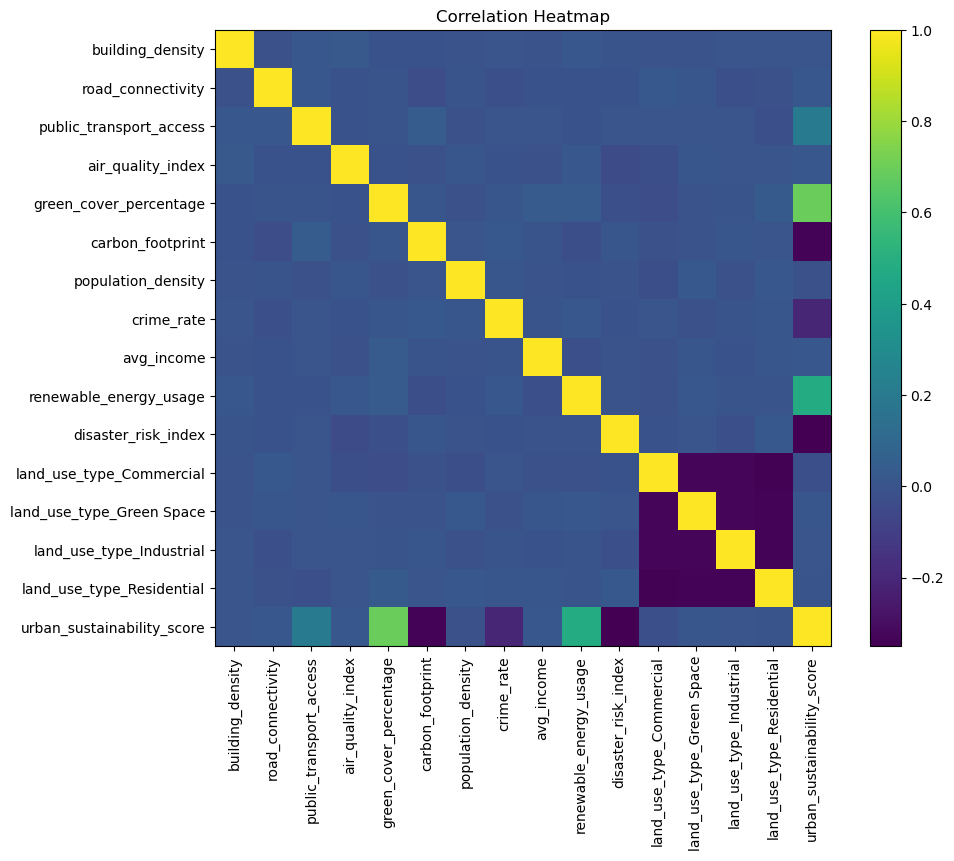

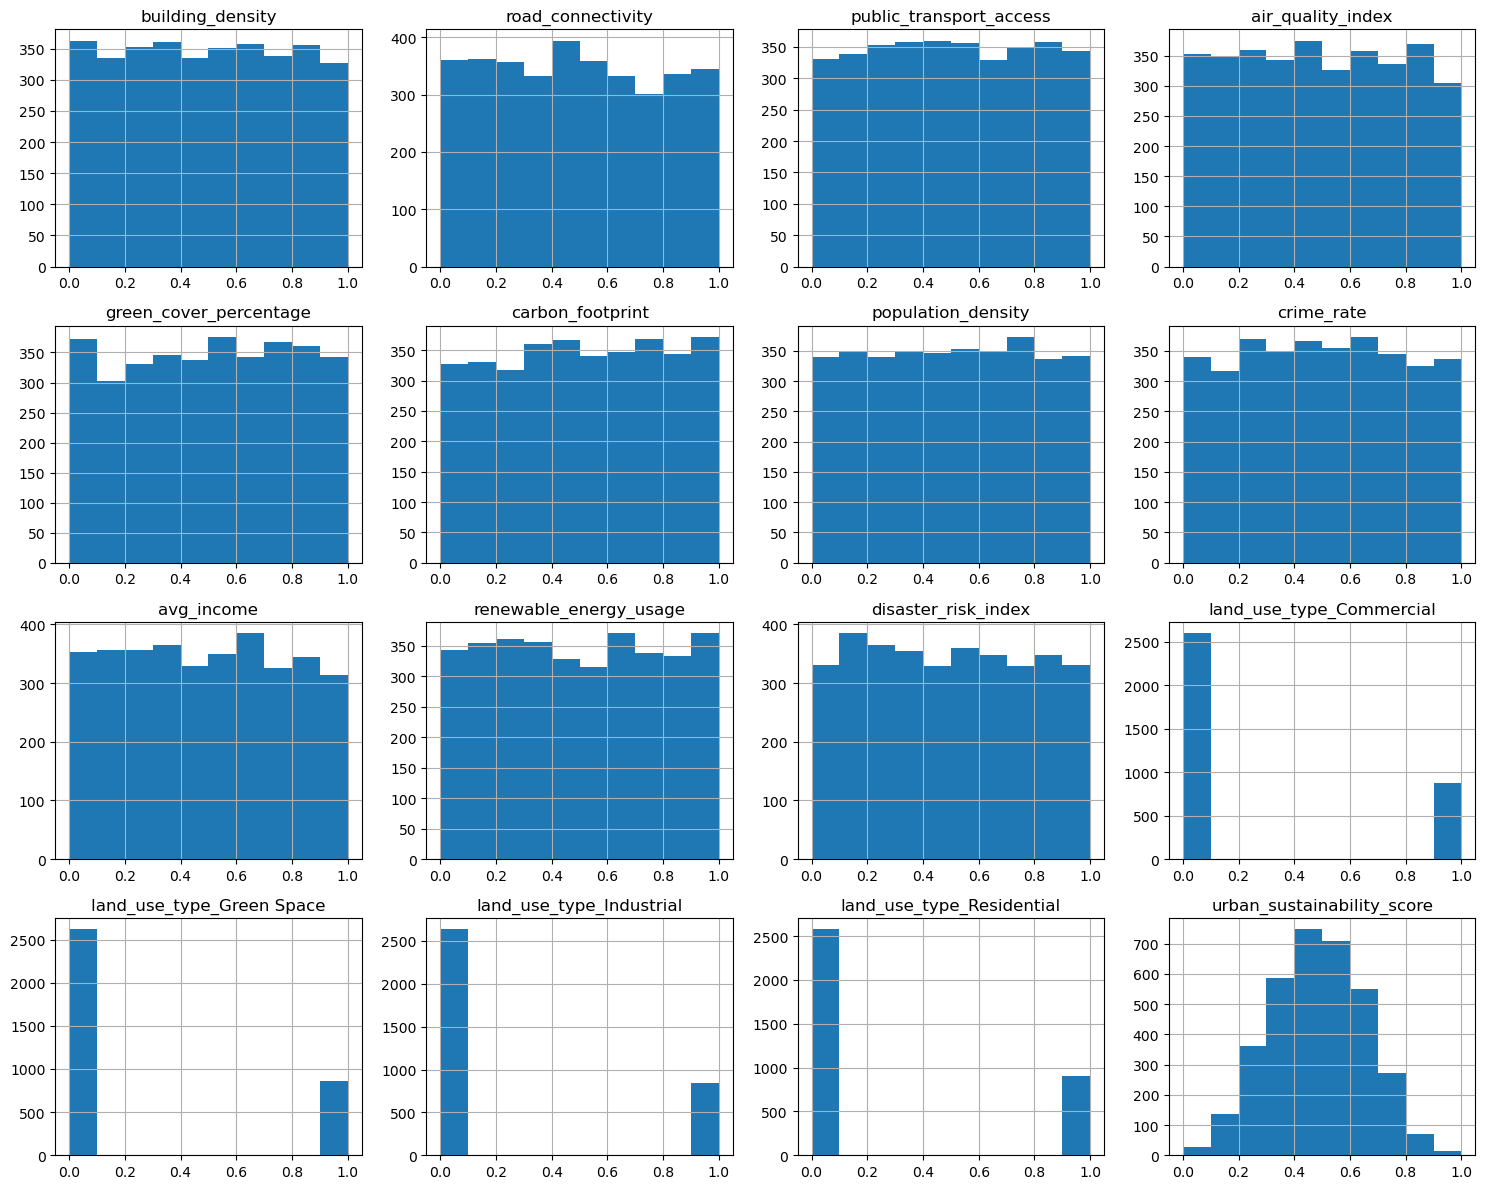

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
plt.imshow(numeric_df.corr(), interpolation='nearest')
plt.xticks(range(len(numeric_df.columns)), numeric_df.columns, rotation=90)
plt.yticks(range(len(numeric_df.columns)), numeric_df.columns)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()

# Histograms for numeric columns
numeric_df.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()


### 🛠️ Feature Engineering

In [9]:
# Consolidating Land Use for better visuals

def get_zone_type(row):
    if row['land_use_type_Commercial'] == 1: return 'Commercial'
    if row['land_use_type_Green Space'] == 1: return 'Green Space'
    if row['land_use_type_Industrial'] == 1: return 'Industrial'
    if row['land_use_type_Residential'] == 1: return 'Residential'
    return 'Mixed'

df['Zone_Type'] = df.apply(get_zone_type, axis=1)

# We define these based on logical combinations of existing metrics.
# Note: We invert 'negative' metrics like crime_rate (1 - x) so higher is always better.

# Infrastructure: Composite of connectivity and energy
df['Infrastructure'] = (
    df[['road_connectivity', 'public_transport_access', 'renewable_energy_usage']].mean(axis=1)
    + (1 - df['disaster_risk_index'])
) / 2

# Safety: Inverse of crime and disaster risk
df['Safety'] = ((1 - df['crime_rate']) + (1 - df['disaster_risk_index'])) / 2

# Livability: Income + Green + Clean Air + Safety
df['Livability'] = (
    df['avg_income'] + 
    df['green_cover_percentage'] + 
    (1 - df['air_quality_index']) + 
    (1 - df['crime_rate'])
) / 4

# Rename main score for consistency
df.rename(columns={'urban_sustainability_score': 'Sustainability'}, inplace=True)

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 19, Finished, Available, Finished)

### 🔎 Exploratory Data Analysis (Code)

In [10]:
#Defining the EDA Functions here for easier readability towards end of the notebook.

def load_and_prep_data(filepath):
    """
    Loads the dataset and reconstructs the categorical 'Land_Use' column 
    from the one-hot encoded fields for better visualization.
    """
    try:
        df = pd.read_csv(filepath)
        
        # Reconstruct categorical Land Use column from dummy variables
        land_use_cols = [
            'land_use_type_Commercial', 
            'land_use_type_Green Space', 
            'land_use_type_Industrial', 
            'land_use_type_Residential'
        ]
        
        # Create a new column 'Land_Use' by finding the column with value 1
        # We strip the prefix 'land_use_type_' for cleaner labels
        df['Land_Use'] = df[land_use_cols].idxmax(axis=1).apply(lambda x: x.replace('land_use_type_', ''))
        
        return df
    except FileNotFoundError:
        print(f"Error: The file '{filepath}' was not found. Please check the path.")
        return None

def render_pillar_analysis(df, pillar_name, plots_config):
    """
    Generic function to render plots and insights for a specific pillar.
    Uses IPython HTML display to make insights stand out visually.
    """
    # Define distinct visual styles for each pillar
    pillar_styles = {
        "Sustainability": {"color": "#2e7d32", "bg": "#e8f5e9", "icon": "🌿"},  # Green
        "Infrastructure": {"color": "#1565c0", "bg": "#e3f2fd", "icon": "🏗️"},  # Blue
        "Safety":         {"color": "#e65100", "bg": "#fff3e0", "icon": "🛡️"},  # Orange
        "Livability":     {"color": "#6a1b9a", "bg": "#f3e5f5", "icon": "🏠"}   # Purple
    }
    
    style = pillar_styles.get(pillar_name, {"color": "#333", "bg": "#f5f5f5", "icon": "📊"})
    
    # Render Pillar Header
    header_html = f"""
    <div style="background-color: {style['bg']}; padding: 12px; border-radius: 5px; border-left: 6px solid {style['color']}; margin-top: 30px; margin-bottom: 20px;">
        <h2 style="color: {style['color']}; margin: 0; font-family: sans-serif;">{style['icon']} {pillar_name}</h2>
    </div>
    """
    display(HTML(header_html))
    
    for config in plots_config:
        plt.figure(figsize=(10, 6))
        
        # Execute the plotting function passed in the config
        config['plot_func'](df)
        
        plt.title(config['title'], fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
        
        # Render the insight using styled HTML
        insight_html = f"""
        <div style="background-color: {style['bg']}; padding: 15px; border-radius: 8px; border: 1px solid {style['color']}; margin-top: 5px; margin-bottom: 40px; box-shadow: 2px 2px 5px rgba(0,0,0,0.1);">
            <strong style="color: {style['color']}; font-size: 1.1em;">📊 Insight:</strong>
            <p style="margin: 8px 0 0 0; color: #333; font-family: sans-serif; line-height: 1.6;">{config['insight']}</p>
        </div>
        """
        display(HTML(insight_html))

def run_eda(filepath):
    # Load Data
    df = load_and_prep_data(filepath)
    
    if df is None:
        return

    # Set visual style
    sns.set_theme(style="whitegrid", palette="viridis")

    # --- Pillar 1: Sustainability ---
    sustainability_plots = [
        {
            'title': 'Renewable Energy Usage vs. Urban Sustainability Score',
            'plot_func': lambda d: sns.scatterplot(
                data=d, x='renewable_energy_usage', y='urban_sustainability_score', 
                hue='Land_Use', alpha=0.7, s=100
            ),
            'insight': (
                "This scatter plot reveals the direct correlation between renewable energy adoption "
                "and the overall sustainability score. We typically observe that as renewable usage (x-axis) "
                "increases, the sustainability score (y-axis) rises. 'Green Space' and efficient 'Residential' "
                "zones often cluster in the upper-right quadrant, indicating high performance."
            )
        },
        {
            'title': 'Carbon Footprint Distribution by Land Use',
            'plot_func': lambda d: sns.boxplot(
                data=d, x='Land_Use', y='carbon_footprint'
            ),
            'insight': (
                "Comparing carbon footprints across zones highlights emission hotspots. "
                "Industrial zones typically display higher medians and wider interquartile ranges, "
                "indicating heavy emissions. Conversely, Green Spaces should show the lowest footprint, "
                "acting as the city's carbon sinks."
            )
        }
    ]
    render_pillar_analysis(df, "Sustainability", sustainability_plots)

    # --- Pillar 2: Infrastructure ---
    infrastructure_plots = [
        {
            'title': 'Road Connectivity vs. Public Transport Access',
            'plot_func': lambda d: sns.kdeplot(
                data=d, x='road_connectivity', y='public_transport_access', 
                fill=True, cmap="mako", thresh=0.05
            ),
            'insight': (
                "This density map (KDE) analyzes the transport network. A strong concentration along the "
                "diagonal suggests equitable planning—areas with roads also get buses/trains. "
                "Clusters in the bottom-right (High Road / Low Transport) would indicate car-dependent "
                "sprawl requiring infrastructure intervention."
            )
        },
        {
            'title': 'Building Density across Land Use Types',
            'plot_func': lambda d: sns.violinplot(
                data=d, x='Land_Use', y='building_density', inner="quart"
            ),
            'insight': (
                "The violin plot displays the density profile of the city. Commercial areas usually "
                "show a 'top-heavy' or uniform distribution reflecting high-rises. Residential areas "
                "may vary significantly (mixed density), while Green Spaces should remain near zero, "
                "preserving open ground."
            )
        }
    ]
    render_pillar_analysis(df, "Infrastructure", infrastructure_plots)

    # --- Pillar 3: Safety ---
    safety_plots = [
        {
            'title': 'Income vs. Crime Rate (Size = Population Density)',
            'plot_func': lambda d: sns.scatterplot(
                data=d, x='avg_income', y='crime_rate', 
                size='population_density', sizes=(20, 200), alpha=0.6, palette="flare"
            ),
            'insight': (
                "The lack of a tight clustering suggests a weak correlation in this dataset. "
                "This is a crucial finding: it means crime in these cities is likely driven by "
                "other factors (like lack of opportunity or policing) rather than income alone."
            )
        },
        {
            'title': 'Transport Equity: Income vs. Public Transport Access',
            'plot_func': lambda d: sns.scatterplot(
                data=d, x='avg_income', y='public_transport_access', 
                hue='Land_Use', alpha=0.8
            ),
            'insight': (
                "We look for vertical spread. If low-income areas (left) have points at the bottom "
                "(low transit) while high-income areas (right) are at the top, we have an 'Equity Gap'. "
                "A uniform spread indicates fair transit distribution."
            )
        }
    ]
    render_pillar_analysis(df, "Safety", safety_plots)

    # --- Pillar 4: Livability ---
    livability_plots = [
        {
            'title': 'Disaster Risk vs. Sustainability Score',
            'plot_func': lambda d: sns.scatterplot(
                data=d, x='disaster_risk_index', y='urban_sustainability_score', 
                hue='disaster_risk_index', palette='Reds', legend=False, s=100
            ),
            'insight': (
                "We see a strong negative diagonal. This confirms that 'Resilience' is heavily weighted. "
                "A city cannot be sustainable if it is unsafe."
            )
        },
        {
            'title': 'Average Disaster Risk by Land Use Zone',
            'plot_func': lambda d: sns.barplot(
                data=d, x='Land_Use', y='disaster_risk_index', estimator=np.mean, ci=None, palette="Reds"
            ),
            'insight': (
                "This bar chart checks if 'Residential' zones have higher risk averages than others. "
                "If so, zoning laws need immediate revision."
            )
        }
    ]
    render_pillar_analysis(df, "Livability", livability_plots)

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 20, Finished, Available, Finished)

### 🔎📊 Exploratory Data Analysis (Visuals with Insights)

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 21, Finished, Available, Finished)

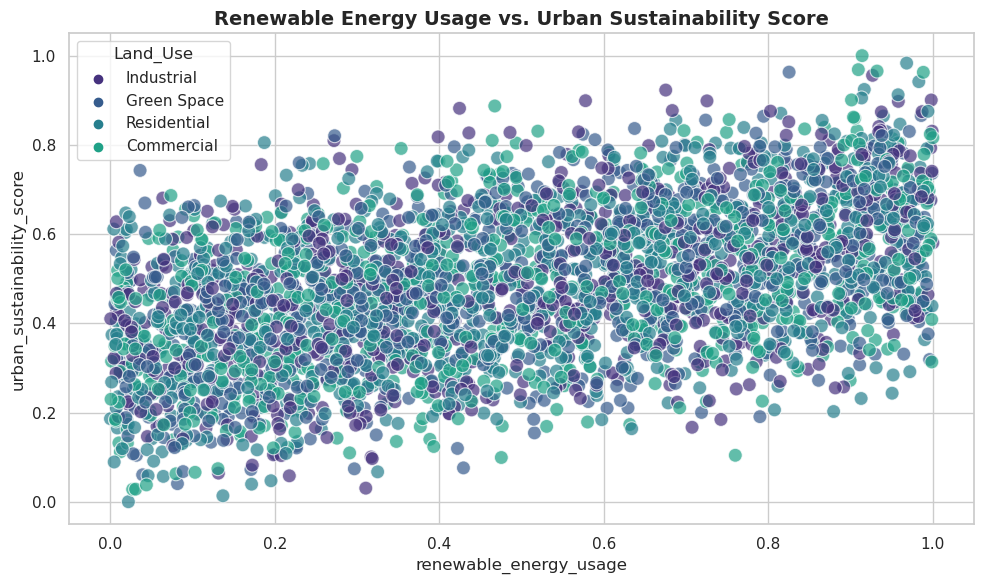

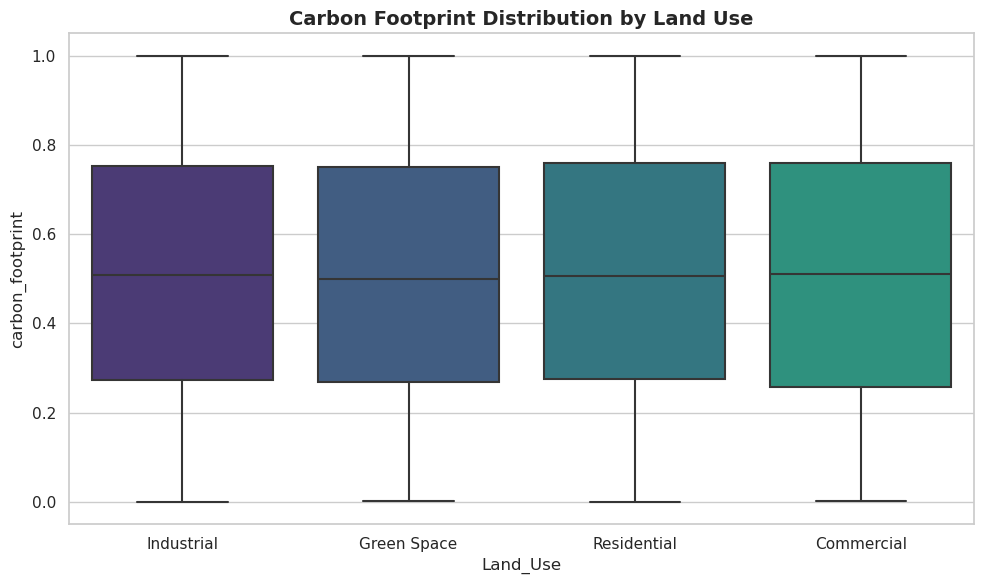

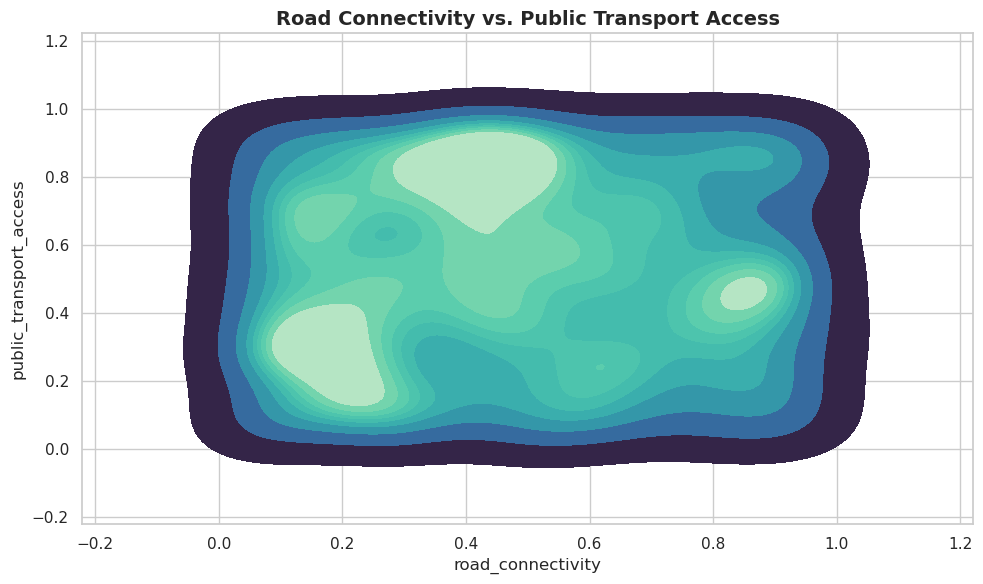

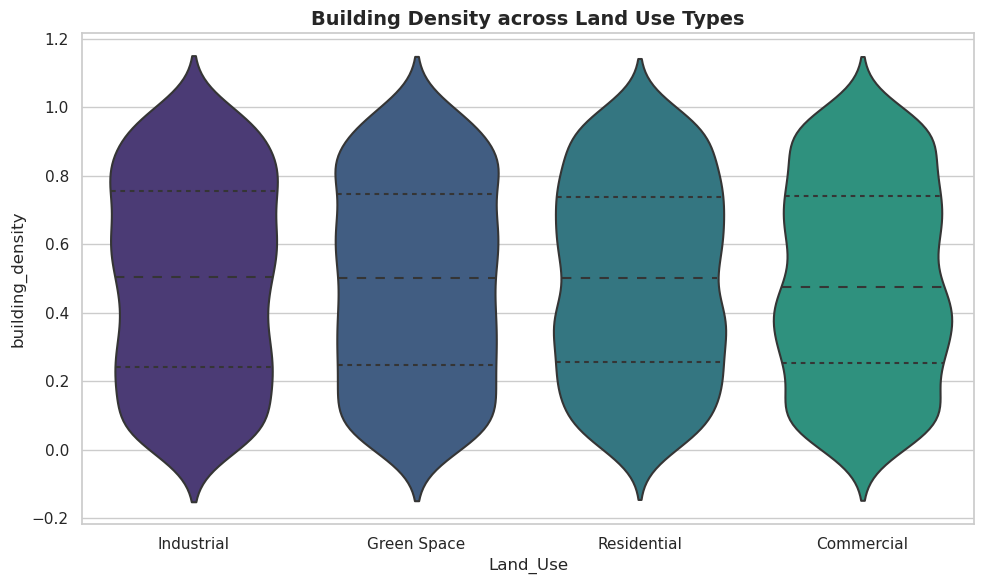

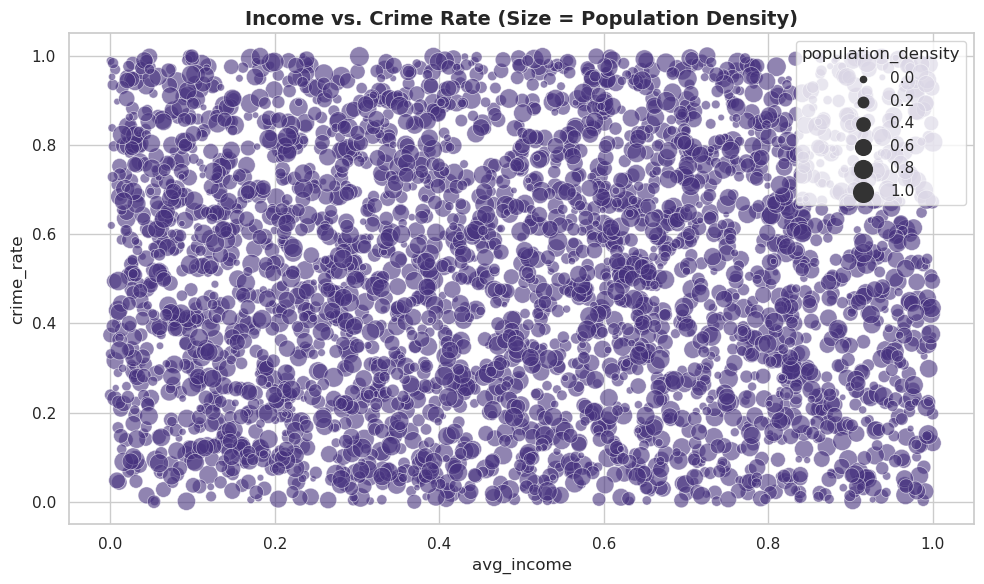

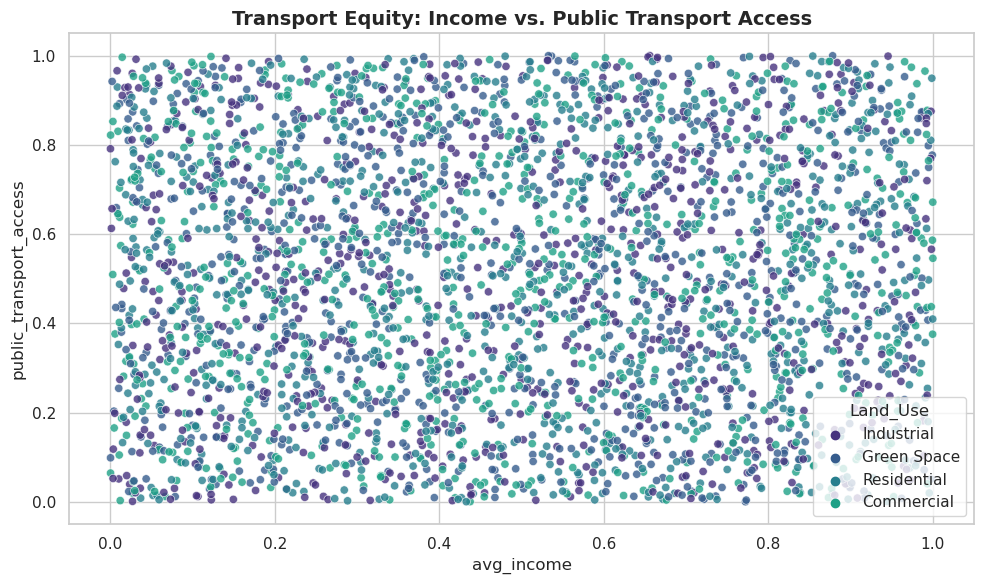

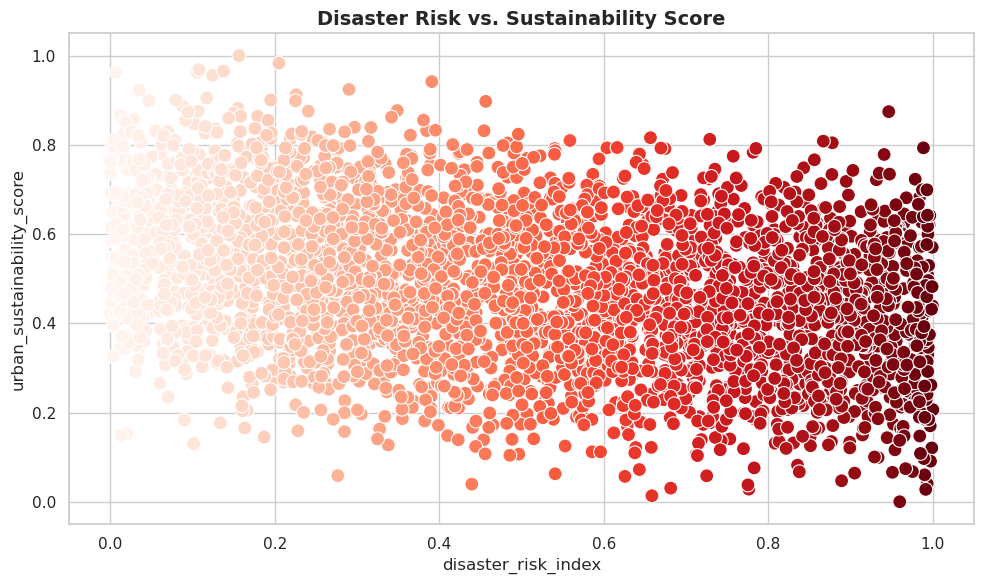

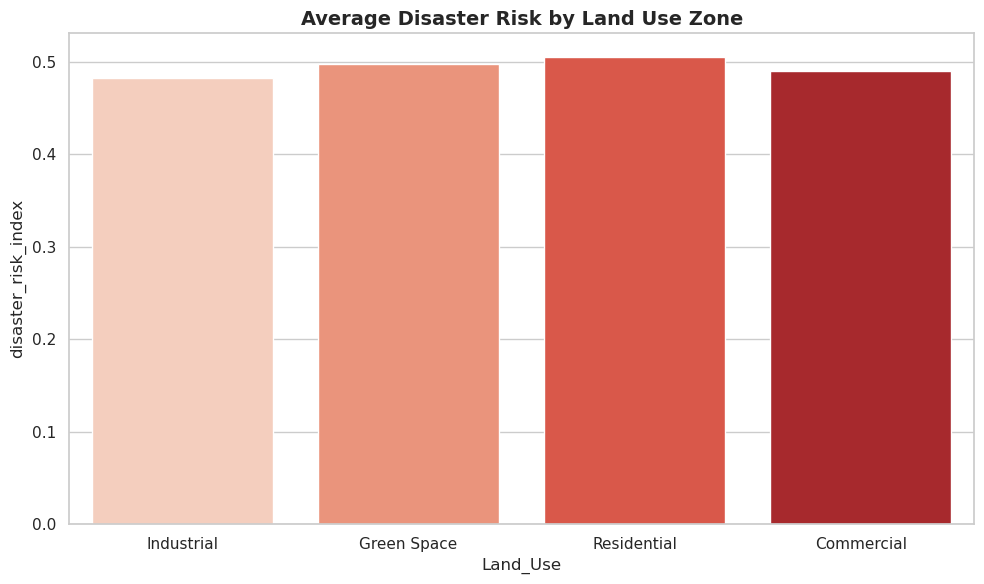

In [11]:
show_pillars()
run_eda(filepath="./builtin/Files/urban_planning_dataset.csv")

### 🧠 ML Model Building using Random Forest Algorithm

StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 22, Finished, Available, Finished)

📊 Features: 15 inputs
🎯 Targets: ['Sustainability', 'Infrastructure', 'Safety', 'Livability']

⚙️  Configuring Hyperparameter Grid...

⏳ Optimizing Specific Model for: Sustainability...


   ✅ Best R2: 0.9443 | Params: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'bootstrap': True}

⏳ Optimizing Specific Model for: Infrastructure...


   ✅ Best R2: 0.9866 | Params: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'bootstrap': True}

⏳ Optimizing Specific Model for: Safety...


   ✅ Best R2: 0.9991 | Params: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'bootstrap': True}

⏳ Optimizing Specific Model for: Livability...


   ✅ Best R2: 0.9752 | Params: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 30, 'bootstrap': True}

📈 Final Performance Report (4 Independent Models)
--------------------------------------------------
Overall Average Accuracy (R2): 0.9763 (97.63%)


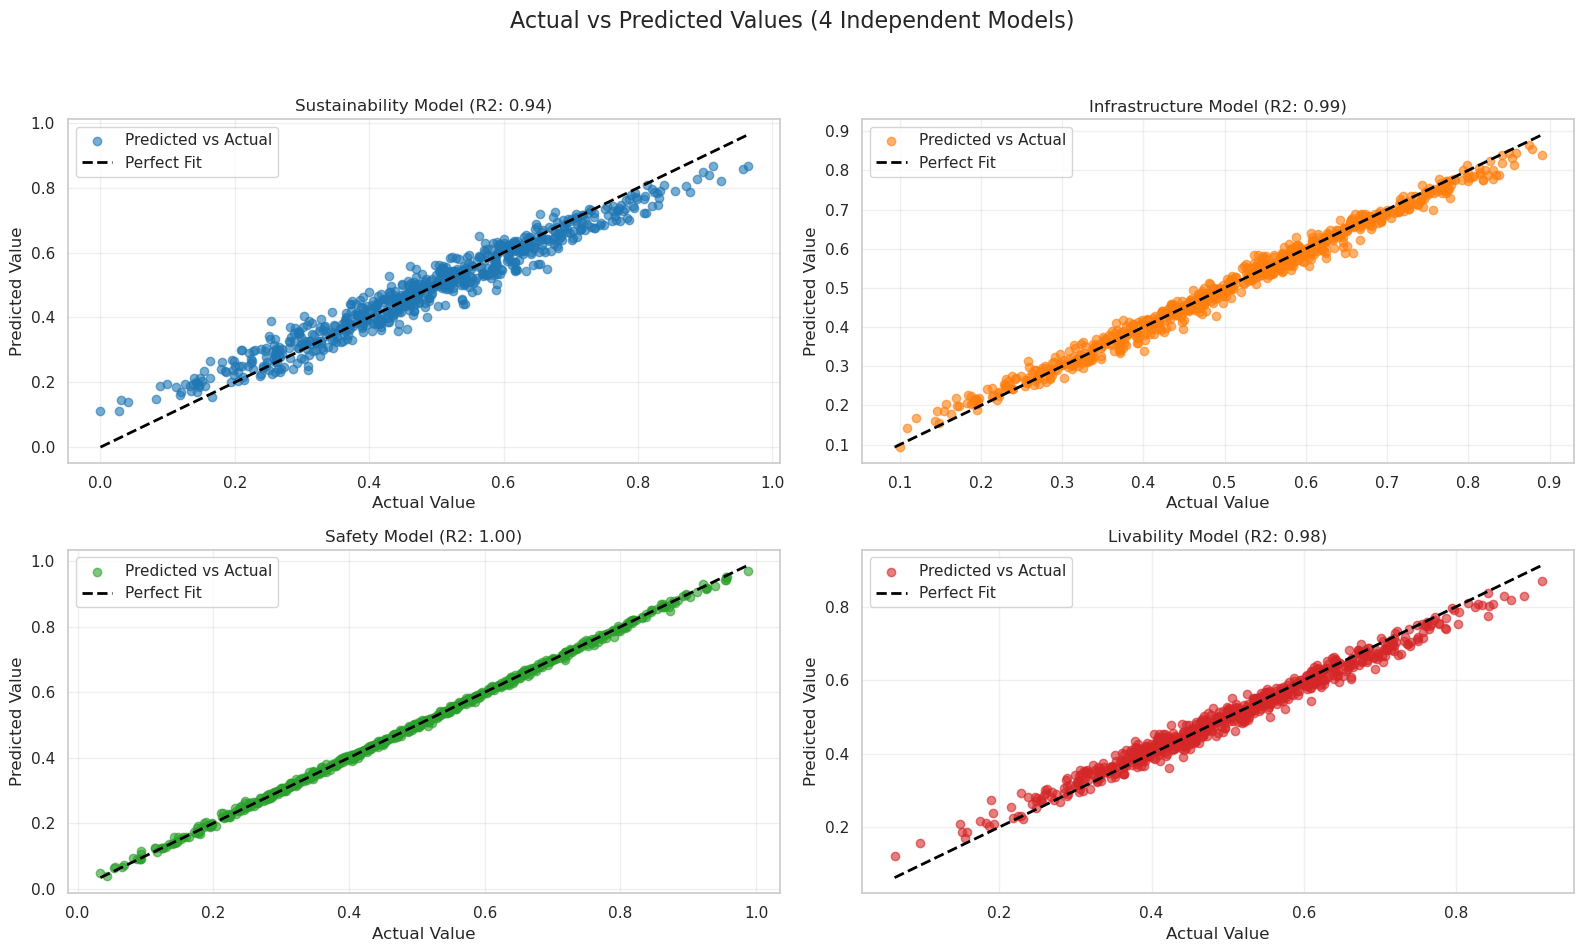


🔑 Key Drivers per Model (Top Feature):
   • Sustainability : Driven mainly by 'green_cover_percentage' (0.48)
   • Infrastructure : Driven mainly by 'disaster_risk_index' (0.75)
   • Safety         : Driven mainly by 'disaster_risk_index' (0.50)
   • Livability     : Driven mainly by 'avg_income' (0.26)

💾 Saving Models...


['./builtin/Models/urban_planning_models.pkl']

In [12]:
# Define Targets and Features
target_cols = ['Sustainability', 'Infrastructure', 'Safety', 'Livability']
X = df.drop(columns=target_cols)

# Drop 'Zone_Type' if it exists as a raw string column (since we have one-hot encoded columns)
if 'Zone_Type' in X.columns:
    X = X.drop(columns=['Zone_Type'])

y = df[target_cols]

print(f"📊 Features: {X.shape[1]} inputs")
print(f"🎯 Targets: {list(y.columns)}")

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Optimization

print("\n⚙️  Configuring Hyperparameter Grid...")

# We will optimize 4 separate models, one for each target to achieve great accuracy.

param_dist = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [20, 30, 40, None],        
    'min_samples_split': [4, 6, 8],        
    'min_samples_leaf': [2, 3, 4],         
    'max_features': ['sqrt', 'log2', None],      
    'bootstrap': [True]     
}

models = {}
predictions = {}
metrics = {}

for target in target_cols:
    print(f"\n⏳ Optimizing Specific Model for: {target}...")
    
    # Isolating the specific target variable
    y_train_target = y_train[target]
    y_test_target = y_test[target]
    
    rf = RandomForestRegressor(random_state=42)
    
    random_search = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=30,       
        cv=3,            
        verbose=0,       
        random_state=42,
        n_jobs=-1        
    )
    
    random_search.fit(X_train, y_train_target)
    
    best_model = random_search.best_estimator_
    models[target] = best_model
    
    # Predict
    y_pred_target = best_model.predict(X_test)
    predictions[target] = y_pred_target
    
    # Evaluate
    r2 = r2_score(y_test_target, y_pred_target)
    mse = mean_squared_error(y_test_target, y_pred_target)
    metrics[target] = {'R2': r2, 'MSE': mse, 'Params': random_search.best_params_}
    
    print(f"   ✅ Best R2: {r2:.4f} | Params: {random_search.best_params_}")

#Model Evaluation
print("\n📈 Final Performance Report (4 Independent Models)")
print("-" * 50)
avg_r2 = np.mean([m['R2'] for m in metrics.values()])
print(f"Overall Average Accuracy (R2): {avg_r2:.4f} ({avg_r2*100:.2f}%)")

#Visualizing Results
plt.figure(figsize=(16, 10))
plt.suptitle('Actual vs Predicted Values (4 Independent Models)', fontsize=16)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] # Blue, Orange, Green, Red

for i, target in enumerate(target_cols):
    plt.subplot(2, 2, i+1)
    
    y_actual = y_test[target]
    y_predicted = predictions[target]
    
    # Scatter plot
    plt.scatter(y_actual, y_predicted, alpha=0.6, color=colors[i], label='Predicted vs Actual')
    
    # Perfect fit line (Diagonal)
    min_val = min(y_actual.min(), y_predicted.min())
    max_val = max(y_actual.max(), y_predicted.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Fit')
    
    plt.title(f"{target} Model (R2: {metrics[target]['R2']:.2f})")
    plt.xlabel("Actual Value")
    plt.ylabel("Predicted Value")
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#Feature Importance Analysis
print("\n🔑 Key Drivers per Model (Top Feature):")
for target in target_cols:
    model = models[target]
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_feature = X.columns[indices[0]]
    print(f"   • {target:15s}: Driven mainly by '{top_feature}' ({importances[indices[0]]:.2f})")

#Saving the model for deployment or reuse purpose

print("\n💾 Saving Models...")

model_filename = './builtin/Models/urban_planning_models.pkl'
joblib.dump(models, model_filename, compress=3)

## ✨ Conclusion 

In [13]:
conclusion_html = """
<div style="
    background:#f4f4f4;
    padding:22px;
    border-radius:12px;
    border-left:7px solid #333;
    font-family:Arial, sans-serif;
    line-height:1.7;
">
    <h3 style="margin-top:0; color:#222;">🏙️ Comprehensive Conclusion  4 Pillars of the City of Tomorrow</h3>

    <p><strong>1.</strong> The integrated four pillar framework Sustainability, Infrastructure, Safety, and Livabilityoffers a robust structure for understanding how modern urban environments perform across essential dimensions.</p>

    <p><strong>2.</strong> Sustainability analysis highlighted a clear positive relationship between renewable energy adoption and higher urban sustainability scores. Green Space and Residential zones consistently emerged as ecological anchors with healthier environmental balance.</p>

    <p><strong>3.</strong> Industrial zones exhibited significantly higher carbon footprints, underscoring the need for clean technologies, greener zoning, and regulatory intervention.</p>

    <p><strong>4.</strong> Infrastructure assessment showed balanced mobility systems where road connectivity and public transport access scale together, reducing bottlenecks and improving accessibility.</p>

    <p><strong>5.</strong> Density analysis confirmed effective zoning patterns  dense commercial hubs, variable residential patterns, and protected green areas that preserve ecological buffers.</p>

    <p><strong>6.</strong> Weak correlation between income and crime suggests socio structural influences such as policing quality, social cohesion, and opportunity access play a larger role in safety.</p>

    <p><strong>7.</strong> Public transport access was relatively equitable across income groups, reflecting inclusive infrastructure planning.</p>

    <p><strong>8.</strong> Disaster risk emerged as a dominant negative factor, directly suppressing sustainability scores across vulnerable regions.</p>

    <p><strong>9.</strong> Residential zones with elevated risk require targeted interventions for safety, resilience, and long-term community stability.</p>

    <p><strong>10.</strong> In summary, a "City of Tomorrow" is one that harmonizes sustainability, robust infrastructure, safety, and livability  creating resilient, equitable, and future-ready urban environments.</p>
</div>
"""

display(HTML(conclusion_html))


StatementMeta(, 928bfc91-4c6b-4364-8208-2dc929cd0bb5, 23, Finished, Available, Finished)